In [2]:
# numerical computation
import numpy as np
import itertools
from random import randint
# import matplotlib and allow it to plot inline
import matplotlib.pyplot as plt
%matplotlib inline

# import sklearn

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.preprocessing import StandardScaler


# dataframe management
import pandas as pd

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


%autosave 60

Autosaving every 60 seconds


## Selección de caracteriticas en base a la relación lineal entre carac. en cada codificación.
    En este método depende de la clasificación en la que se va a proceder para elegir las caractertisticas, por eso tendremos 3 por cada BBDD.
    Prueba F de Fisher consiste en calcular las relaciones lineales entre características y etiquetas. Una característica altamente correlacionada recibe una puntuación más alta y las características menos correlacionadas obtienen una puntuación más baja.
    Debido a que no soporta multi etiqueta, debemos probar las etiquetas una a una.

In [3]:
def opened (path=''):
    
    X_training=[]
    y_training=[]
           
    for j in range(0, 50):
        X_training.append(pd.read_csv('test_train_dataset{}{}_X_train.csv'.format(path,j)))
        y_training.append(pd.read_csv('test_train_dataset{}{}_y_train.csv'.format(path, j)))      
    return X_training, y_training

In [4]:
def select_features (path, name):    
    x_train, y_train= opened(path=path)
    feature_importances = []

    
    for s in range(0, 50):
        x_training = x_train[s][x_train[s].columns[2:2265]]
        columns_df = list(x_train[s].columns[2:2265])
        ss=StandardScaler()
        ss.fit(x_training)
        ss_train=ss.transform(x_training)

        for p in y_train[s]:
            selector = SelectKBest(f_classif, k=100).fit(ss_train, y_train[s][p])
            feature_importances.append(selector.scores_)
        
    importances = pd.DataFrame(feature_importances, columns = columns_df)
    maximun = pd.DataFrame({'Código' : columns_df, 'Valor' : list(importances.sum())})
    select_codes = maximun.sort_values(by='Valor',ascending=False).head(n=100)
    codes=list(select_codes['Código'])
    codes.append('Edad')
    codes.append('Sexo')
    
    
    with open("feature_selection/fc_{}.txt".format(name), "w") as file:
        file.write(str(list(codes)))
    
    return select_codes

In [5]:
path_label= ['/label/O_WL_A_', '/label/O_WL_WO_', '/label/P_WL_A_', '/label/P_WL_WO_']
name_all=['label_o_all','label_o_ill', 'label_p_all', 'label_p_ill']

In [6]:
alpha=0
codes = []
for p, n in zip(path_label, name_all):
    codes.append(select_features(path=p,name=n))
    alpha+=1
    print(alpha)

/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_se

/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_se

/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_se

/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_se

1


/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_se

/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_se

/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_se

/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_se

2


/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_se

/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_se

/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_se

/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_se

3


/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_se

/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_se

/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_se

/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_se

4


In [7]:
label_codes =[]
for i in range(0, 4):    
    label_codes.append(codes[i])

In [8]:
OS = codes[0].head(25)
OE = codes[1].head(25)
PS=codes[2].head(25)
PE=codes[3].head(25)
OS_OE = (set(list(OS['Código']))).intersection(set(list(OE['Código'])))
PS_PE = (set(list(PS['Código']))).intersection(set(list(PE['Código'])))

print('Ocurrencia: ')
Dif_1_OS_OE = (set(list(OS['Código']))).difference(set(list(OE['Código'])))
print('   SanosVSEnfermos: ', Dif_1_OS_OE)
Dif_2_OS_OE = (set(list(OE['Código']))).difference(set(list(OS['Código'])))
print('   EnfermosVSSanos: ', Dif_2_OS_OE)

print('Presencia: ')
Dif_1_PS_PE = (set(list(PS['Código']))).difference(set(list(PE['Código'])))
print('   SanosVSEnfermos: ', Dif_1_PS_PE)
Dif_2_PS_PE = (set(list(PE['Código']))).difference(set(list(PS['Código'])))
print('   EnfermosVSSanos: ', Dif_2_PS_PE)

Ocurrencia: 
   SanosVSEnfermos:  {'C09DA', 'C09CA', 'A10BD'}
   EnfermosVSSanos:  {'A10AB', '386', 'N06AX'}
Presencia: 
   SanosVSEnfermos:  {'N06AB', 'C08CA', 'C09CA', 'A10BD'}
   EnfermosVSSanos:  {'A10AB', '386', 'A03FA', 'R05CB'}


In [9]:
valores_label = ['OS', 'OE', 'PS', 'PE']
OS_OE = sorted(OS_OE)
PS_PE = sorted(PS_PE)
to_plot_oc = pd.DataFrame()
to_plot_pr = pd.DataFrame()
for i in range(0,4):
    if i ==0 or i ==1:
        extra_1 =label_codes[i][label_codes[i]['Código'].isin(list(OS_OE))]
        extra_2 = extra_1.sort_values(by='Código',ascending=True)
        to_plot_oc[valores_label[i]] = extra_2['Valor']
    else:
        extra_1 =label_codes[i][label_codes[i]['Código'].isin(list(PS_PE))]
        extra_2 = extra_1.sort_values(by='Código',ascending=True)
        to_plot_pr[valores_label[i]] = extra_2['Valor']

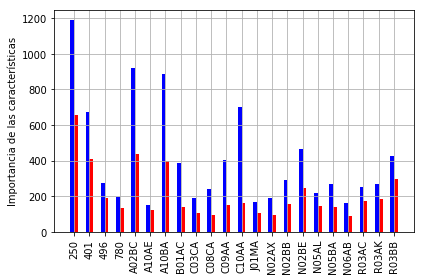

<Figure size 432x288 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt


x = np.arange(len(list(OS_OE)))

y = to_plot_oc[valores_label[0]]/50
z = to_plot_oc[valores_label[1]]/50

A =OS_OE
w = 0.25
ax = plt.subplot(111)
plt.xticks(x + w /2, A, rotation='vertical')

D = ax.bar(x, y, width=w, color='b', align='center')
F = ax.bar(x+w, z, width=w, color='red', align='center')
plt.ylabel('Importancia de las características')
plt.tight_layout()
plt.grid()
plt.show()
plt.savefig("pictures/FC_Ocurrencia_Label.png")

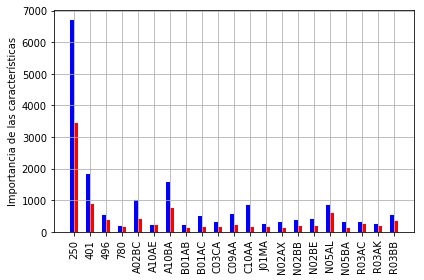

<Figure size 432x288 with 0 Axes>

In [11]:
x = np.arange(len(list(PS_PE)))
k = to_plot_pr[valores_label[2]]/50
j = to_plot_pr[valores_label[3]]/50
A =PS_PE
w = 0.25

ax = plt.subplot(111)
plt.xticks(x + w /2, A, rotation='vertical')

G = ax.bar(x, k, width=w, color='b', align='center')
H = ax.bar(x+w, j, width=w, color='red', align='center')
plt.ylabel('Importancia de las características')
plt.tight_layout()
plt.grid()
plt.show()
plt.savefig("pictures/FC_Presencia_Label.png")

In [12]:
path_class= ['/class/O_WC_A_', '/class/O_WC_WO_', '/class/P_WC_A_', '/class/P_WC_WO_']
name_all=['class_o_all','class_o_ill', 'class_p_all', 'class_p_ill']

In [13]:
alpha=0
codes = []
for p, n in zip(path_class, name_all):
    codes.append(select_features(path=p,name=n))
    alpha+=1
    print(alpha)   

/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_se

/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


1


/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_se

/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


2


/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_se

/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


3


/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_se

/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/alumnos/pvecino/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


4


In [14]:
OS = codes[0].head(25)
OE = codes[1].head(25)
PS=codes[2].head(25)
PE=codes[3].head(25)
OS_OE = (set(list(OS['Código']))).intersection(set(list(OE['Código'])))
PS_PE = (set(list(PS['Código']))).intersection(set(list(PE['Código'])))

print('Ocurrencia: ')
Dif_1_OS_OE = (set(list(OS['Código']))).difference(set(list(OE['Código'])))
print('   SanosVSEnfermos: ', Dif_1_OS_OE)
Dif_2_OS_OE = (set(list(OE['Código']))).difference(set(list(OS['Código'])))
print('   EnfermosVSSanos: ', Dif_2_OS_OE)

print('Presencia: ')
Dif_1_PS_PE = (set(list(PS['Código']))).difference(set(list(PE['Código'])))
print('   SanosVSEnfermos: ', Dif_1_PS_PE)
Dif_2_PS_PE = (set(list(PE['Código']))).difference(set(list(PS['Código'])))
print('   EnfermosVSSanos: ', Dif_2_PS_PE)

Ocurrencia: 
   SanosVSEnfermos:  {'C09BA'}
   EnfermosVSSanos:  {'N05CD'}
Presencia: 
   SanosVSEnfermos:  {'C09BA', 'C09CA'}
   EnfermosVSSanos:  {'780', 'R05CB'}


In [15]:
class_codes =[]
for i in range(0, 4):    
    class_codes.append(codes[i])

In [16]:
valores_label = ['OS', 'OE', 'PS', 'PE']
OS_OE = sorted(OS_OE)
PS_PE = sorted(PS_PE)
to_plot_oc = pd.DataFrame()
to_plot_pr = pd.DataFrame()
for i in range(0,4):
    if i ==0 or i ==1:
        extra_1 =class_codes[i][class_codes[i]['Código'].isin(list(OS_OE))]
        extra_2 = extra_1.sort_values(by='Código',ascending=True)
        to_plot_oc[valores_label[i]] = extra_2['Valor']
    else:
        extra_1 =class_codes[i][class_codes[i]['Código'].isin(list(PS_PE))]
        extra_2 = extra_1.sort_values(by='Código',ascending=True)
        to_plot_pr[valores_label[i]] = extra_2['Valor']

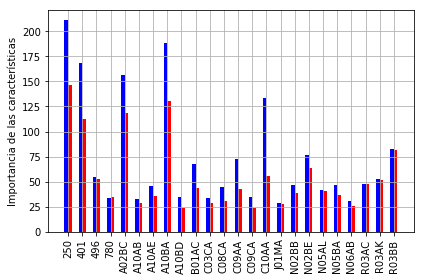

<Figure size 432x288 with 0 Axes>

In [17]:
x = np.arange(len(list(OS_OE)))

y = to_plot_oc[valores_label[0]]/50
z = to_plot_oc[valores_label[1]]/50

A =OS_OE
w = 0.25
ax = plt.subplot(111)
plt.xticks(x + w /2, A, rotation='vertical')

D = ax.bar(x, y, width=w, color='b', align='center')
F = ax.bar(x+w, z, width=w, color='red', align='center')
plt.ylabel('Importancia de las características')
plt.tight_layout()
plt.grid()
plt.show()
plt.savefig("pictures/FC_Ocurrencia_Clase.png")

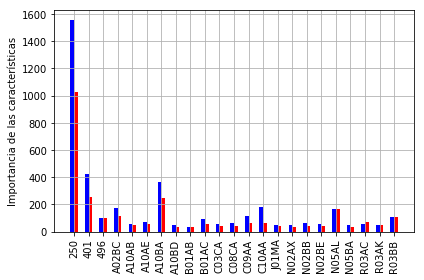

<Figure size 432x288 with 0 Axes>

In [18]:
x = np.arange(len(list(PS_PE)))
k = to_plot_pr[valores_label[2]]/50
j = to_plot_pr[valores_label[3]]/50
A =PS_PE
w = 0.25

ax = plt.subplot(111)
plt.xticks(x + w /2, A, rotation='vertical')

G = ax.bar(x, k, width=w, color='b', align='center')
H = ax.bar(x+w, j, width=w, color='red', align='center')
plt.ylabel('Importancia de las características')
plt.tight_layout()
plt.grid()
plt.show()
plt.savefig("pictures/FC_Presencia_Clase.png")